# Data Cleaning and Visualization

Read in the data

In [112]:
import pandas as pd

column_names = ['sentiment', 'headline']
pathname = 'financial_news_headlines.csv'
sentiment_df = pd.read_csv(pathname, encoding='ISO-8859-1', header=None, names=column_names)

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle


corpus = sentiment_df['headline']
labels = sentiment_df['sentiment']

corpus_shuffled, labels_shuffled = shuffle(corpus, labels, random_state=1)
corpus_train, corpus_test, labels_train, labels_test = train_test_split(corpus_shuffled, labels_shuffled, test_size=0.2, random_state=1)

In [114]:
print(corpus_train[:5])
print(corpus_train.shape)
print(corpus_test[:5])
print(corpus_test.shape)

3096    Protalix closed at $ 10.71 on Friday on the Am...
2303    The Bristol Port Company has sealed a one mill...
4171      Another problem is cola-flavoured long drinks .
1383    The group also plans to launch the 270 room At...
2363    A meeting of Glisten shareholders to vote on t...
Name: headline, dtype: object
(3876,)
3370    The Swedish player became majority owner of UC...
4298    `` We have a license agreement with Nokia Corp...
2417    Basware Einvoices Oy will be merged into the p...
4531    Finnlines estimated in its annual general meet...
3146    TeliaSonera s subsidiary , the mobile operator...
Name: headline, dtype: object
(970,)


Some visualizations

Text feature extraction and data splitting

In [115]:
#Text feature extraction (using Bag of Words approach with unigrams) for training data
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Use Two words as tokens
X_train = vectorizer.fit_transform(corpus_train)
y_train = np.array(labels_train)
print(X_train.shape)
print(y_train.shape)
feature_names = vectorizer.get_feature_names_out()

(3876, 49802)
(3876,)


In [116]:
#Text feature extraction (using Bag of Words approach with unigrams) for testing data
X_test = vectorizer.transform(corpus_test)
y_test = np.array(labels_test)
print(X_test.shape)
print(y_test.shape)

(970, 49802)
(970,)


# Logistic Regression

In [103]:
#Logistic regression 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Logistic regression: Hyperparameter tuning 


Note: The code below takes a long time to run, so we have commented it out and hardcoded the best parameters after tuning in the next section.

In [8]:
#Hyperparameter tuning
# logreg_costlist1 = {'C': [1, 10, 20, 30, 40, 50, 100]} 
# logreg = LogisticRegression(max_iter=1000, random_state=1)

# cost_grid1 = GridSearchCV(logreg, logreg_costlist1, cv=5, scoring='f1_weighted')
# cost_grid1.fit(X_train, y_train)
# best_C1 = cost_grid1.best_params_['C']
# print(best_C1) #50 

In [9]:
# logreg_costlist2 = {'C': [50, 60, 70, 80, 90, 100]} 
# cost_grid2 = GridSearchCV(logreg, logreg_costlist2, cv=5, scoring='f1_weighted')
# cost_grid2.fit(X_train, y_train)
# best_C2 = cost_grid2.best_params_['C'] 
# print(best_C2) #90

Logistic regression: Final model, results, and coefficients

In [104]:
best_C = 90 #20 for unigram
logreg_final = LogisticRegression(C=best_C, max_iter=1000, random_state=1)
logreg_final.fit(X_train, y_train)
y_pred = logreg_final.predict(X_test)

In [105]:
from sklearn.metrics import classification_report

logreg_report = classification_report(y_test, y_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])

# Print the classification report
print(logreg_report)

                precision    recall  f1-score   support

Class Negative       0.78      0.57      0.66       121
Class Positive       0.80      0.89      0.84       569
 Class Neutral       0.71      0.64      0.68       280

      accuracy                           0.78       970
     macro avg       0.77      0.70      0.73       970
  weighted avg       0.77      0.78      0.77       970



In [107]:
weights = logreg_final.coef_  #get weights
print(weights)
sorted_weights = np.argsort(weights)  #sort weights
feature_names = vectorizer.get_feature_names_out()  #get the features
print(feature_names)

print('\nLowest weighted words (indicative of positive sentiment)')
for i in range(20):
    print(f"{feature_names[sorted_weights[0, i]]}: {weights[0, sorted_weights[0, i]]}")
    
print('\nHighest weighted words (indicative of negative sentiment)')
for i in range(20):
    print(f"{feature_names[sorted_weights[0, len(sorted_weights[0]) - i - 1]]}: {weights[0, sorted_weights[0, len(sorted_weights[0]) - i - 1]]}")

[[-1.03151005 -0.00661198 -0.23602923 ... -0.05836561 -0.0291828
  -0.0291828 ]
 [ 0.49027664  0.07880493  0.17179529 ...  0.29304051  0.14652026
   0.14652026]
 [ 0.54123341 -0.07219295  0.06423393 ... -0.23467491 -0.11733745
  -0.11733745]]
['00' '00 aldata' '00 am' ... 'ðl' 'ðl including' 'ðl volume']

Lowest weighted words (indicative of positive sentiment)
was loss: -4.525012797114654
rose: -4.320706250177454
up: -4.199602888568563
increased: -4.166697887639045
rose to: -3.7354283577714122
up from: -3.5700867933926586
increase: -3.501075077674327
and: -3.284067356885426
new: -3.1550033748303425
is: -2.6970096754288133
business: -2.6937142526330815
profit rose: -2.6761040960963074
will: -2.643197016643059
an: -2.6381016312683885
to negative: -2.588993974442831
eur0 01: -2.51328050148955
period was: -2.494247344210332
grew: -2.400821217844131
mn up: -2.1935224604988774
increased by: -2.19304720703623

Highest weighted words (indicative of negative sentiment)
down: 9.949186553060787


# SVM

SVM-linear kernel

SVM-linear kernel: Hyperparameter Tuning

In [15]:
from sklearn.svm import SVC
# svm_linear = SVC(kernel='linear', probability=True)  
# svm_linear_costlist1 = {
#     'C': [0.1, 1, 5, 10, 15, 20],
# }
# cost_grid1 = GridSearchCV(svm_linear, svm_linear_costlist1, cv=5, scoring='f1_weighted')
# cost_grid1.fit(X_train, y_train)
# best_C1 = cost_grid1.best_params_['C']
# print(best_C1) #10

SVM-linear kernel: Final model and results

In [16]:
best_C = 10 #5 for unigram

In [17]:
svc_linear_final = SVC(kernel='linear', probability=True, C=best_C)
svc_linear_final.fit(X_train, y_train)
svc_linear_pred = svc_linear_final.predict(X_test)

In [18]:
svc_linear_report = classification_report(y_test, svc_linear_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])
print(svc_linear_report)

                precision    recall  f1-score   support

Class Negative       0.74      0.62      0.67       121
Class Positive       0.80      0.86      0.83       569
 Class Neutral       0.68      0.63      0.65       280

      accuracy                           0.76       970
     macro avg       0.74      0.70      0.72       970
  weighted avg       0.76      0.76      0.76       970



SVM-poly kernel

SVM-poly kernel: Hyperparameter tuning

In [19]:
# #SVM with a polynomial kernel
# svm_poly = SVC(kernel='poly', probability=True)  
# svm_poly_params = {
#     'C': [0.1, 1, 10, 20, 30],
#     'degree': [2, 3, 4]
# }
# cost_grid1 = GridSearchCV(svm_poly, param_grid=svm_poly_params, cv=5, scoring='f1_weighted')
# cost_grid1.fit(X_train, y_train)
# best_C1 = cost_grid1.best_params_['C']
# best_degree1 = cost_grid1.best_params_['degree']
# print(best_C1) #10
# print(best_degree1) #2

SVM-poly kernel: Final model and results

In [20]:
best_C = 10 #20 for unigram
best_degree = 2 #no change compared to unigram

In [21]:
svm_poly_final = SVC(kernel='poly', probability=True, C=best_C, degree=best_degree)
svm_poly_final.fit(X_train, y_train)
svc_poly_pred = svm_poly_final.predict(X_test)

In [22]:
svc_poly_report = classification_report(y_test, svc_poly_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])

#print classification report
print(svc_poly_report)

                precision    recall  f1-score   support

Class Negative       0.82      0.27      0.41       121
Class Positive       0.69      0.99      0.81       569
 Class Neutral       0.85      0.33      0.48       280

      accuracy                           0.71       970
     macro avg       0.79      0.53      0.57       970
  weighted avg       0.75      0.71      0.66       970



SVM-rbf kernel

SVM-rbf kernel: Hyperparameter tuning 

In [23]:
#SVM with a rbf kernel
# svm_rbf = SVC(kernel='rbf', probability=True)

# svm_poly_params = {
#     'C': [0.1, 1, 10, 20, 30],
#     'gamma': [1, 0.1, 0.01, 0.001]
# }
# cost_grid1 = GridSearchCV(svm_rbf, param_grid=svm_poly_params, cv=5, scoring='f1_weighted')
# cost_grid1.fit(X_train, y_train)
# best_C1 = cost_grid1.best_params_['C']
# best_gamma1 = cost_grid1.best_params_['gamma']
# print(best_C1) #30
# print(best_gamma1) #0.1

SVM-rbf kernel: Final model and results

In [33]:
best_C = 30 #20 for unigram 
best_gamma = 0.1 #no change compared to unigram

In [34]:
svm_rbf_final = SVC(kernel='rbf', probability=True, C=best_C, gamma=best_gamma)
svm_rbf_final.fit(X_train, y_train)

SVC(C=30, gamma=0.1, probability=True)

In [35]:
svm_rbf_pred = svm_poly_final.predict(X_test)

In [36]:
svm_rbf_report = classification_report(y_test, svm_rbf_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])

#print classification report
print(svm_rbf_report)

                precision    recall  f1-score   support

Class Negative       0.82      0.27      0.41       121
Class Positive       0.69      0.99      0.81       569
 Class Neutral       0.85      0.33      0.48       280

      accuracy                           0.71       970
     macro avg       0.79      0.53      0.57       970
  weighted avg       0.75      0.71      0.66       970



# Neural Networks

Neural networks: Hyperparameter tuning

We were unable to perform hyperparameter tuning here because the code was not able to finish running in 24h. We were also unable to reduce the dimensionality using PCA because our X_train matrix is sparse. We opted to fit the model using the same hyperparameters as those optimized in the unigram appraoch.

In [97]:
best_activation = 'logistic'
best_alpha = 0.01
best_hidden_layer_sizes = (100,) #one layer with 100 neurons
neural_final = MLPClassifier(activation=best_activation, alpha=best_alpha, hidden_layer_sizes=best_hidden_layer_sizes)
neural_final.fit(X_train, y_train)
neural_pred = neural_final.predict(X_test)
neural_report = classification_report(y_test, neural_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])

#print classification report
print(neural_report)

                precision    recall  f1-score   support

Class Negative       0.79      0.55      0.64       121
Class Positive       0.80      0.88      0.84       569
 Class Neutral       0.70      0.66      0.68       280

      accuracy                           0.77       970
     macro avg       0.76      0.69      0.72       970
  weighted avg       0.77      0.77      0.77       970



/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Decision Tree and Random Forest 

In [38]:
from sklearn import tree  # Using sklearn Decision Tree classifier
from sklearn import ensemble  # Using sklearn Random Forest classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Decision tree: Hyperparameter tuning

In [39]:
# Tuning max_depth for Decision Tree
# dt_params = {'max_depth': [None, 10, 20, 30, 40, 50]}
# dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='f1_weighted')
# dt_grid.fit(X_train, y_train)
# print(dt_grid.best_params_) #30

In [40]:
best_max_depth = 30 #no change compared to unigram

Decision tree: Final model and results

In [117]:
from sklearn.metrics import classification_report 
dt_final = DecisionTreeClassifier(max_depth=best_max_depth, random_state=42)
dt_final.fit(X_train, y_train)
dt_y_pred = dt_final.predict(X_test)
dt_report = classification_report(y_test, dt_y_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])
print(dt_report)

                precision    recall  f1-score   support

Class Negative       0.57      0.42      0.49       121
Class Positive       0.74      0.91      0.81       569
 Class Neutral       0.70      0.45      0.55       280

      accuracy                           0.71       970
     macro avg       0.67      0.59      0.62       970
  weighted avg       0.71      0.71      0.70       970



Random forest: Hyperparameter tuning

In [42]:
# rf_params =  {'max_depth': [30, 40, 50, 100, 200, 500, 1000]}
# rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1_weighted')
# rf_grid.fit(X_train, y_train)
# print(rf_grid.best_params_) #200 

In [43]:
best_n_estimators = 200 #no change compared to unigram

Random forest: Final model and results

In [44]:
from sklearn.metrics import classification_report 
rf_final = RandomForestClassifier(n_estimators=200, random_state=42)
rf_final.fit(X_train, y_train)
rf_y_pred = rf_final.predict(X_test)
rf_report = classification_report(y_test, rf_y_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])
print(rf_report)

                precision    recall  f1-score   support

Class Negative       0.84      0.36      0.50       121
Class Positive       0.73      0.98      0.83       569
 Class Neutral       0.82      0.44      0.58       280

      accuracy                           0.75       970
     macro avg       0.80      0.59      0.64       970
  weighted avg       0.77      0.75      0.72       970



In [45]:
feature_importances = rf_final.feature_importances_
feature_names = vectorizer.get_feature_names_out() 
print(feature_importances[:10])

[6.21029582e-05 3.72235142e-06 2.45700362e-06 1.97314601e-05
 1.99738592e-06 7.78912332e-06 0.00000000e+00 7.56531433e-06
 1.23486350e-05 4.26296168e-06]


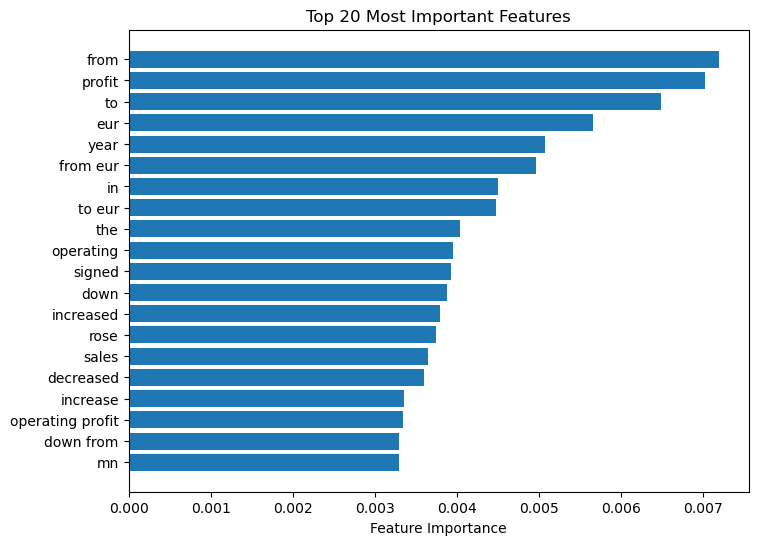

In [47]:
import matplotlib.pyplot as plt

top_feature_indices = np.argsort(feature_importances)[-20:]
top_feature = feature_importances[top_feature_indices]

plt.figure(figsize=(8, 6))
plt.barh(range(len(top_feature_indices)), top_feature, align='center')
plt.yticks(np.arange(len(top_feature_indices)), np.array(feature_names)[top_feature_indices])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features')
plt.show()

# kNN

In [48]:
#kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

kNN: Hyperparameter tuning

In [50]:
# Initialize KNN Classifier
# knn = KNeighborsClassifier()

# # Define the parameter grid
# knn_params = {
#     'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
# }

# # Create a GridSearchCV object
# grid_search = GridSearchCV(knn, knn_params, cv=5, n_jobs=-1, verbose=1) #9

In [51]:
best_n_neighbors = 9

kNN: Final model and results

In [52]:
# Fit the model
knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

# Test the model
kNN_report = classification_report(y_test, y_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])
print(kNN_report)

                precision    recall  f1-score   support

Class Negative       0.48      0.44      0.46       121
Class Positive       0.75      0.85      0.79       569
 Class Neutral       0.59      0.44      0.51       280

      accuracy                           0.68       970
     macro avg       0.61      0.58      0.59       970
  weighted avg       0.67      0.68      0.67       970



# Perceptron

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron

In [109]:
perceptron_model = Perceptron(random_state=1)
perceptron_model.fit(X_train, y_train)
y_pred = perceptron_model.predict(X_test)

# Test the model
perceptron_report = classification_report(y_test, y_pred, target_names=['Class Negative', 'Class Positive', 'Class Neutral'])
print(perceptron_report)

                precision    recall  f1-score   support

Class Negative       0.73      0.62      0.67       121
Class Positive       0.81      0.84      0.83       569
 Class Neutral       0.68      0.67      0.68       280

      accuracy                           0.76       970
     macro avg       0.74      0.71      0.72       970
  weighted avg       0.76      0.76      0.76       970



In [111]:
weights = perceptron_model.coef_[0]
feature_names = vectorizer.get_feature_names_out() 

positive_weights = [(feature, weight) for feature, weight in zip(feature_names, weights) if weight > 0]
negative_weights = [(feature, weight) for feature, weight in zip(feature_names, weights) if weight < 0]
sorted_positive_weights = sorted(positive_weights, key=lambda x: x[1], reverse=True)
sorted_negative_weights = sorted(negative_weights, key=lambda x: x[1])

print("Top Positive Weights (indicative of negative sentiment):")
for feature, weight in sorted_positive_weights[:20]:
    print(f"{feature}: {weight}")

# Print the top negative weights
print("\nTop Negative Weights (indicative of positive sentiment):")
for feature, weight in sorted_negative_weights[:20]:
    print(f"{feature}: {weight}")

Top Positive Weights (indicative of negative sentiment):
down: 2.2344543312979077
decreased: 2.1245584819715306
fell: 1.790737057473698
mn in: 1.3298333901437867
lower: 1.3220589031379586
decreased to: 1.2571484334492873
down from: 1.2465780109720805
off: 1.13976057002856
to profit: 1.0869564075155482
was negative: 1.0372903860571603
eur0 05: 1.0300697911790073
result: 1.0234421391997603
cut: 1.0035429829532154
staff: 0.959048103709246
below: 0.9371401421038408
because of: 0.9344935121061244
lay: 0.9284739242461951
profit fell: 0.8803529341381022
36 points: 0.8727780029637465
rose 36: 0.8727780029637465

Top Negative Weights (indicative of positive sentiment):
rose: -1.294477709400527
rose to: -1.21681662129432
28 points: -1.0920576189343176
rose 28: -1.0920576189343176
increased: -1.0782046992981065
up from: -1.0555676743073175
was loss: -1.0377121900828046
up: -1.0084523913101004
period was: -0.9376054167130201
increase: -0.8236608894000695
profit rose: -0.8096862741048911
to negativ

# Clustering

In [63]:
from sklearn.cluster import KMeans

costs = []
k_values = [1,2,3,4,5,6,7,8,9,10]
for k in k_values:
    clustering = KMeans(n_clusters=k)
    
    # Fit the model and calculate the cost
    clustering.fit(X_train)
    costs.append(clustering.inertia_)

/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


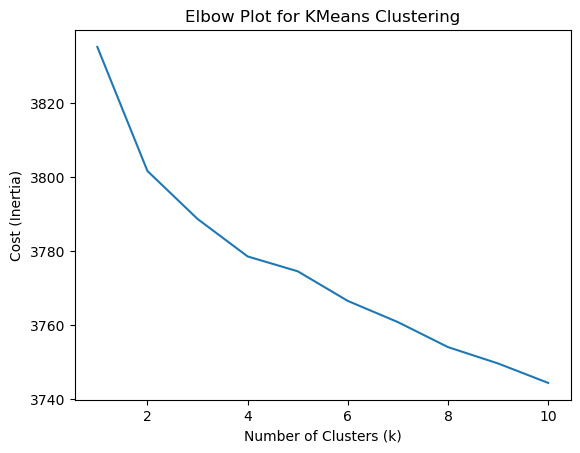

In [64]:
plt.plot(k_values, costs)
plt.title('Elbow Plot for KMeans Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost (Inertia)')
plt.show() #about 3 or 4

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=1)
kmeans_assignment = kmeans.fit_predict(X_train)
print(kmeans_assignment[:10])

/Users/victorialu/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 1 1 1 1 1 1 1 0 1]


In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

label_encoder = LabelEncoder()
actual_labels_numeric = label_encoder.fit_transform(y_train)

# Calculate accuracy
accuracy = accuracy_score(kmeans_assignment, actual_labels_numeric)
print(accuracy) #0.13906088751289988 pretty poor

0.6148090815273478
